# Necessary libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix



ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\alija\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py)

Loading the dataset:

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


Data Preprocessing and Cleaning

In [4]:

# Handle missing values
df["bmi"] = df["bmi"].replace("N/A", pd.NA)
df["bmi"] = df["bmi"].astype(float)

# Convert categorical variables to numerical representations
df["gender"] = df["gender"].map({"Male": 0, "Female": 1})
df["ever_married"] = df["ever_married"].map({"No": 0, "Yes": 1})
df["work_type"] = df["work_type"].map({"Private": 0, "Self-employed": 1, "Govt_job": 2, "children": 3, "Never_worked": 4})
df["Residence_type"] = df["Residence_type"].map({"Rural": 0, "Urban": 1})
df["smoking_status"] = df["smoking_status"].map({"never smoked": 0, "formerly smoked": 1, "smokes": 2, "Unknown": 3})

# Drop unnecessary columns
df = df.drop("id", axis=1)

# Check for any remaining missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Save the cleaned dataset
df.to_csv("cleaned_healthcare_dataset.csv", index=False)

Missing Values:
gender                 1
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Filled the dataset

In [5]:

# Load the dataset
df = pd.read_csv('cleaned_healthcare_dataset.csv')

# Calculate the mean of the BMI column with one digit after the decimal point
mean_bmi = round(df['bmi'].mean(), 1)

# Replace missing values with the column mean
df['bmi'].fillna(mean_bmi, inplace=True)

# Save the cleaned dataset to a new file
df.to_csv('cleaned_healthcare_dataset_filled.csv', index=False)

Drop any row has masks for NaN, infinity, and values too large for float64 (Fixing error it happened to us during model training)


In [6]:

# Load the dataset
dataset = pd.read_csv('cleaned_healthcare_dataset_filled.csv')

# Specify the columns to check for problematic values
columns_to_check = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type',
                    'avg_glucose_level', 'bmi', 'smoking_status']

# Create masks for NaN, infinity, and values too large for float64 dtype
nan_mask = dataset[columns_to_check].isnull()
inf_mask = np.isinf(dataset[columns_to_check])
large_mask = np.abs(dataset[columns_to_check]) > np.finfo(np.float64).max

# Combine the masks to identify the problematic values
problematic_values_mask = np.logical_or(nan_mask, np.logical_or(inf_mask, large_mask))

# Drop the rows with problematic values
dataset_dropped = dataset.drop(dataset[problematic_values_mask.any(axis=1)].index)

# Reset the index of the resulting dataset
dataset_dropped.reset_index(drop=True, inplace=True)

# Save the cleaned dataset to a new CSV file
dataset_dropped.to_csv('cleaned_healthcare_dataset_filled_dropped.csv', index=False)


Oversampling the dataset

In [7]:

# Load the dataset
df = pd.read_csv('cleaned_healthcare_dataset_filled_dropped.csv')

# Separate features and target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

# Count the number of instances in each class before oversampling
class_counts_before = y.value_counts()
print("Class distribution before oversampling:")
print(class_counts_before)

# Oversample the minority class
oversampler = RandomOverSampler()
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

# Count the number of instances in each class after oversampling
class_counts_after = pd.Series(y_oversampled).value_counts()
print("\nClass distribution after oversampling:")
print(class_counts_after)

# Create a new DataFrame with the oversampled data
df_oversampled = pd.concat([X_oversampled, y_oversampled], axis=1)

# Save the oversampled dataset to a new CSV file
df_oversampled.to_csv('oversampled_dataset.csv', index=False)

Class distribution before oversampling:
0    4860
1     249
Name: stroke, dtype: int64


NameError: name 'RandomOverSampler' is not defined

# Selecting the features

In [8]:
#load the dataset
df = pd.read_csv('oversampled_dataset.csv')

#selected features
x = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']].values
y = df[['stroke']].values

# Split the dataset into train and test 

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)


# Train the Logistic Regression Model

In [10]:
model_LR= LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

model_LR.fit(x_train, y_train)


C:\Users\alija\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

Training Set Accuracy Score

In [11]:
train_score =model_LR.score(x_train, y_train)
print("Training Set Accuracy Score: ", train_score)


Training Set Accuracy Score:  0.7732216343327455


Testing Set Accuracy Score

In [12]:
test_score =model_LR.score(x_test, y_test)
print("Testing Set Accuracy Score: ", test_score)


Testing Set Accuracy Score:  0.7860082304526749


Confusion Matrix

In [13]:

# Predict the target variable for the test set
y_pred = model_LR.predict(x_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

# Train the Decision Tree model 

In [14]:

model_dt= DecisionTreeClassifier()

model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

Decision Tree Visualization

[Text(0.31836939102564105, 0.9807692307692307, 'x[1] <= 53.5\ngini = 0.5\nsamples = 6804\nvalue = [3414.0, 3390.0]'),
 Text(0.08002136752136751, 0.9423076923076923, 'x[1] <= 37.5\ngini = 0.263\nsamples = 2667\nvalue = [2251, 416]'),
 Text(0.015384615384615385, 0.9038461538461539, 'x[7] <= 57.935\ngini = 0.05\nsamples = 1468\nvalue = [1430, 38]'),
 Text(0.006837606837606838, 0.8653846153846154, 'x[7] <= 57.925\ngini = 0.42\nsamples = 50\nvalue = [35, 15]'),
 Text(0.003418803418803419, 0.8269230769230769, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(0.010256410256410256, 0.8269230769230769, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.023931623931623933, 0.8653846153846154, 'x[1] <= 1.36\ngini = 0.032\nsamples = 1418\nvalue = [1395, 23]'),
 Text(0.017094017094017096, 0.8269230769230769, 'x[8] <= 26.9\ngini = 0.339\nsamples = 60\nvalue = [47, 13]'),
 Text(0.013675213675213675, 0.7884615384615384, 'gini = 0.0\nsamples = 44\nvalue = [44, 0]'),
 Text(0.020512820512820513, 0.7

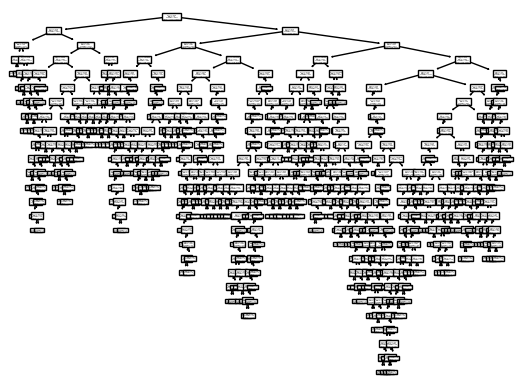

In [15]:
tree.plot_tree(model_dt)

Training Set Accuracy Score

In [16]:

predicted_y_train = model_dt.predict(x_train)

print("Accuracy on Training Data: {:.2f}".format(accuracy_score(y_train, predicted_y_train) * 100))
print("Classification Report on Training Data:\n", classification_report(y_train, predicted_y_train))

Accuracy on Training Data: 100.00
Classification Report on Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3414
           1       1.00      1.00      1.00      3390

    accuracy                           1.00      6804
   macro avg       1.00      1.00      1.00      6804
weighted avg       1.00      1.00      1.00      6804




Testing Set Accuracy Score

In [17]:
predicted_y_test = model_dt.predict(x_test)

print("Accuracy on Test Data: {:.2f}".format(accuracy_score(y_test, predicted_y_test) * 100))
print("Classification Report on Test Data:\n", classification_report(y_test, predicted_y_test))


Accuracy on Test Data: 97.39
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      1446
           1       0.95      1.00      0.97      1470

    accuracy                           0.97      2916
   macro avg       0.98      0.97      0.97      2916
weighted avg       0.98      0.97      0.97      2916



Confusion Matrix

In [18]:

# Predict the target variable for the test set
y_pred = model_dt.predict(x_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

# Here you can test the logistic regression model:

In [19]:


gender = input("Enter gender (0 for female, 1 for male): ")
age = input("Enter age: ")
hypertension = input("Enter hypertension (0 for no, 1 for yes): ")
heart_disease = input("Enter heart disease (0 for no, 1 for yes): ")
ever_married = input("Enter marital status (0 for no, 1 for yes): ")
work_type = input("Enter work type (0 for private, 1 for self-employed, 2 for govt_job, 3 for children, 4 for never_worked): ")
residence_type = input("Enter residence type (0 for rural, 1 for urban): ")
avg_glucose_level = input("Enter average glucose level: ")
bmi = input("Enter BMI: ")
smoking_status = input("Enter smoking status (0 for unknown, 1 for never smoked, 2 for formerly smoked, 3 for smokes): ")


user_inputs = pd.DataFrame({
    'gender': [int(gender)],
    'age': [float(age)],
    'hypertension': [int(hypertension)],
    'heart_disease': [int(heart_disease)],
    'ever_married': [int(ever_married)],
    'work_type': [int(work_type)],
    'Residence_type': [int(residence_type)],
    'avg_glucose_level': [float(avg_glucose_level)],
    'bmi': [float(bmi)],
    'smoking_status': [int(smoking_status)]
})


predictions = model_LR.predict(user_inputs)


if predictions[0] == 0:
    print("The predicted outcome is not stroke.")
else:
    print("The predicted outcome is stroke.")

Enter gender (0 for female, 1 for male): 1
Enter age: 78
Enter hypertension (0 for no, 1 for yes): 0
Enter heart disease (0 for no, 1 for yes): 0
Enter marital status (0 for no, 1 for yes): 1
Enter work type (0 for private, 1 for self-employed, 2 for govt_job, 3 for children, 4 for never_worked): 0
Enter residence type (0 for rural, 1 for urban): 1
Enter average glucose level: 58.57
Enter BMI: 24
Enter smoking status (0 for unknown, 1 for never smoked, 2 for formerly smoked, 3 for smokes): 3
The predicted outcome is stroke.


C:\Users\alija\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# Here you can test the decision tree model:

In [20]:

# Collect user inputs for the features
gender = input("Enter gender (0 for female, 1 for male): ")
age = input("Enter age: ")
hypertension = input("Enter hypertension (0 for no, 1 for yes): ")
heart_disease = input("Enter heart disease (0 for no, 1 for yes): ")
ever_married = input("Enter marital status (0 for no, 1 for yes): ")
work_type = input("Enter work type (0 for private, 1 for self-employed, 2 for govt_job, 3 for children, 4 for never_worked): ")
residence_type = input("Enter residence type (0 for rural, 1 for urban): ")
avg_glucose_level = input("Enter average glucose level: ")
bmi = input("Enter BMI: ")
smoking_status = input("Enter smoking status (0 for unknown, 1 for never smoked, 2 for formerly smoked, 3 for smokes): ")

# Prepare user inputs as a feature matrix
user_inputs = pd.DataFrame({
    'gender': [int(gender)],
    'age': [float(age)],
    'hypertension': [int(hypertension)],
    'heart_disease': [int(heart_disease)],
    'ever_married': [int(ever_married)],
    'work_type': [int(work_type)],
    'Residence_type': [int(residence_type)],
    'avg_glucose_level': [float(avg_glucose_level)],
    'bmi': [float(bmi)],
    'smoking_status': [int(smoking_status)]
})

# Use the trained model to make predictions
predictions = model_dt.predict(user_inputs)

# Interpret and display the model's prediction
if predictions[0] == 0:
    print("The predicted outcome is not stroke.")
else:
    print("The predicted outcome is stroke.")

Enter gender (0 for female, 1 for male): 1
Enter age: 7
Enter hypertension (0 for no, 1 for yes): 0
Enter heart disease (0 for no, 1 for yes): 0
Enter marital status (0 for no, 1 for yes): 0
Enter work type (0 for private, 1 for self-employed, 2 for govt_job, 3 for children, 4 for never_worked): 3
Enter residence type (0 for rural, 1 for urban): 0
Enter average glucose level: 113
Enter BMI: 19
Enter smoking status (0 for unknown, 1 for never smoked, 2 for formerly smoked, 3 for smokes): 3
The predicted outcome is not stroke.


C:\Users\alija\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
